# Get non bonded potential energy

In [1]:
import molsysmt as msm
msm.config.set_default_standard_units(standards=['nm', 'ps', 'K', 'mole', 'amu', 'e',
                                      'kcal/mol', 'kcal/(mol*nm**2)', 'N', 'degrees'])

In [2]:
molecular_system = msm.convert(msm.systems['Barnase-Barstar']['barnase_barstar.h5msm'])

In [3]:
msm.info(molecular_system, element='molecule')

index,name,type,n atoms,n groups,n components,chain index,entity index,entity name
0,BARNASE,protein,1727,110,1,0,0,BARNASE
1,BARSTAR,protein,1432,89,1,0,1,BARSTAR


In [4]:
U1nb2 = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='molecule_name=="BARNASE"',
                                                              selection_2='molecule_name=="BARSTAR"')

In [5]:
U1nb2

<Quantity(-761.417957, 'kilocalorie / mole')>

In [6]:
U12 = msm.molecular_mechanics.get_potential_energy(molecular_system)
U1 = msm.molecular_mechanics.get_potential_energy(molecular_system, selection='molecule_name=="BARNASE"')
U2 = msm.molecular_mechanics.get_potential_energy(molecular_system, selection='molecule_name=="BARSTAR"')

In [7]:
U12-U1-U2

<Quantity(-761.41787, 'kilocalorie / mole')>

In [28]:
U12_groups = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='all in groups of group_index in [0,1,2]',
                                                              selection_2='all in groups of group_index in [100,101,102]')

In [29]:
U12_groups.shape

(3, 3)

In [8]:
U12_groups = msm.molecular_mechanics.get_non_bonded_potential_energy(molecular_system,
                                                              selection='all in groups of molecule_name=="BARNASE"',
                                                              selection_2='all in groups of molecule_name=="BARSTAR"')

In [9]:
U12_groups

Magnitude,[[22.013239719215814 8.221300450611297 0.022280874019257196 ... -0.09654084065604962 0.021273824056863327 -7.069599004480168] [-0.6920593874404353 -0.21573439610847778 0.0021243699422074094 ... 0.003396681230337168 0.000630549901298788 0.15429169452441124] [0.3373296949193309 0.10278165682324031 0.0006231705499652694 ... -0.0027903635232899883 0.0009415938339087521 -0.0857830503474686] ... [17.796437097553152 7.594372984556094 0.056892006620629064 ... -0.11979981573087767 0.09337406655343602 -7.7283131688776185] [0.2754433775039973 0.09804992557253044 0.0005992375186023019 ... -0.0029858166127542233 0.001612231562743907 -0.09203897379552428] [-0.1815851514243307 -0.2708179772926422 0.001121433469585844 ... 0.010794936812851715 -0.017838997777063326 0.5048821122878756]]
Units,kilocalorie/mole


/conda/miniconda3/envs/MolSysMT@uibcdf_3.12/lib/python3.12/site-packages/matplotlib/cbook.py:684: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  x = np.array(x, subok=True, copy=copy)


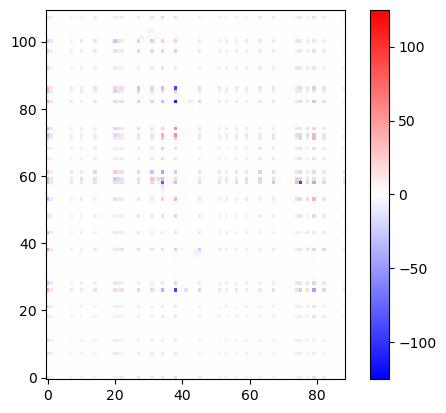

In [10]:
import matplotlib.pyplot as plt

plt.imshow(U12_groups, origin='lower', cmap='bwr', vmin=-125, vmax=125)
plt.colorbar()
plt.show()

/conda/miniconda3/envs/MolSysMT@uibcdf_3.12/lib/python3.12/site-packages/numpy/ma/core.py:2820: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


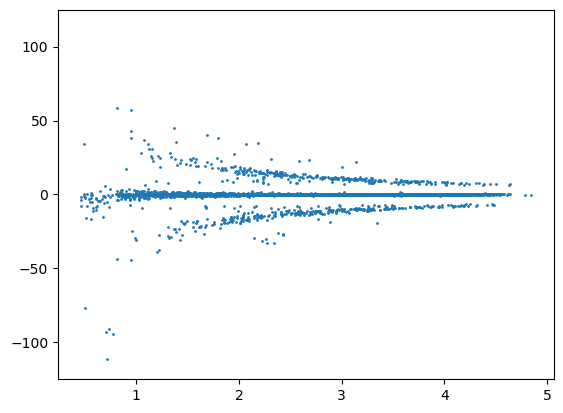

In [11]:
distance = msm.structure.get_distances(molecular_system, selection='all in groups of molecule_name=="BARNASE"',
                 selection_2='all in groups of molecule_name=="BARSTAR"')

plt.scatter(distance.flatten(), U12_groups.flatten(), s=1.0)
plt.ylim([-125.0, 125.0])
plt.show()

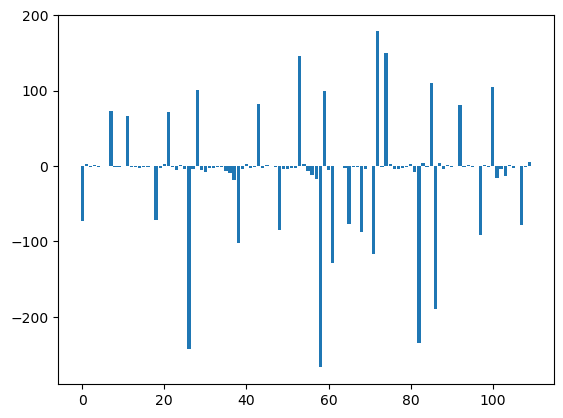

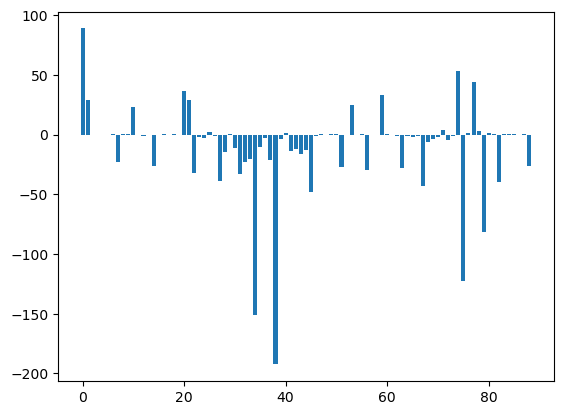

In [12]:
import numpy as np

U12_1_groups= U12_groups.sum(axis=1)
U12_2_groups= U12_groups.sum(axis=0)

plt.bar(np.arange(U12_1_groups.shape[0]), msm.pyunitwizard.get_value(U12_1_groups))
plt.show()

plt.bar(np.arange(U12_2_groups.shape[0]), msm.pyunitwizard.get_value(U12_2_groups))
plt.show()

In [15]:
aux = [ii for ii in msm.pyunitwizard.get_value(U12_1_groups)]
aux += [ii for ii in msm.pyunitwizard.get_value(U12_2_groups)]
aux = np.array(aux)
max_abs_val = max(abs(aux.min()), abs(aux.max()))

view = msm.view(molecular_system)
view.clear()
view.add_cartoon(selection='all')
msm.thirds.nglview.set_color_by_value(view, aux, mid_value=0.0, cmap='bwr_r')
view

NGLWidget()